### Using Weights from a Keras Trained Model to do Inference using Pure Numpy


In [1]:
import os, re
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import json

import np_inference
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

8


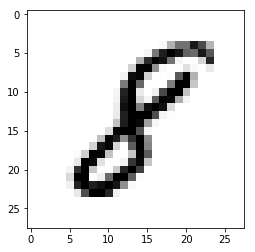

In [4]:
plt.imshow(x_train[7777], cmap='Greys')
print(y_train[7777]) 

In [5]:
# reshpae and normallize for plain NN
# change the y_train/test to binary (Even = 1, Odd = 0)
x_train_1 = x_train.reshape(x_train.shape[0], -1).astype(np.float32)/255
x_test_1 = x_test.reshape(x_test.shape[0], -1).astype(np.float32)/255

y_test_1 = (y_test % 2 == 0).astype(np.uint8)
y_train_1 = (y_train % 2 == 0).astype(np.uint8)


print(x_train_1.shape, x_test_1.shape, x_train_1.dtype, x_test_1.dtype)
print(y_train_1.shape, y_train_1.dtype, y_test_1.shape, y_test_1.dtype)

(60000, 784) (10000, 784) float32 float32
(60000,) uint8 (10000,) uint8


0


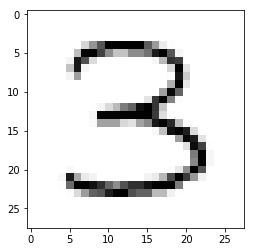

In [6]:
plt.imshow(x_train_1[7778].reshape(28, 28), cmap='Greys')
print(y_train_1[7778]) 

In [7]:
# Train a model

model = Sequential()

# L1
model.add(Dense(units=256, activation='relu', input_shape=x_train_1.shape[1:]))
model.add(Dropout(.4))

# L2
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.4))

#L3 - Output
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 233,985
Trainable params: 233,985
Non-trainable params: 0
_______________

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
model.fit(x=x_train_1, y=y_train_1, validation_data=(x_test_1, y_test_1), epochs=10)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.1346 - acc: 0.9499 - val_loss: 0.0595 - val_acc: 0.9799
Epoch 2/10
60000/60000 [==============================] - 5s 92us/step - loss: 0.0723 - acc: 0.9745 - val_loss: 0.0486 - val_acc: 0.9828
Epoch 3/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0590 - acc: 0.9801 - val_loss: 0.0461 - val_acc: 0.9832
Epoch 4/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0497 - acc: 0.9831 - val_loss: 0.0432 - val_acc: 0.9866
Epoch 5/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0449 - acc: 0.9842 - val_loss: 0.0396 - val_acc: 0.9875
Epoch 6/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0403 - acc: 0.9863 - val_loss: 0.0410 - val_acc: 0.9871
Epoch 7/10
60000/60000 [==============================] - 6s 93us/step - loss: 

In [10]:
model.evaluate(x_test_1, y_test_1)

10000/10000 [==============================] - 0s 25us/step


[0.038347079438439687, 0.9891]

1 0.99998856


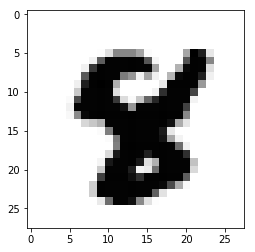

In [16]:
image_index = 7774
plt.imshow(x_test_1[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test_1[image_index].reshape(1,-1))[0][0]
act = y_test_1[image_index]
print(act, pred)

In [33]:
np_inference.save_weights(model, 'weights.npy')

1 0.9999844 0.9999844


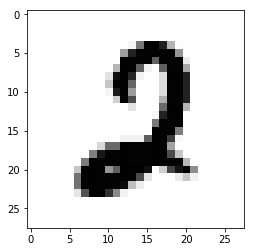

In [37]:
weights = np_inference.load_weights('weights.npy')
image_index = 2572
plt.imshow(x_test_1[image_index].reshape(28,28), cmap='Greys')
pred_keras = model.predict(x_test_1[image_index].reshape(1,-1))[0][0]
pred_np = np_inference.predict_np(x_test_1[image_index], weights)
act = y_test_1[image_index]
print(act, pred_keras, pred_np)


In [ ]:
X1.shape

In [20]:
for layer in model.layers:
    weights = layer.get_weights()
    cfg = layer.get_config()
    print(type(layer))
    print(cfg)

<class 'keras.layers.core.Dense'>
{'name': 'dense_1', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
<class 'keras.layers.core.Dropout'>
{'name': 'dropout_1', 'trainable': True, 'rate': 0.4, 'noise_shape': None, 'seed': None}
<class 'keras.layers.core.Dense'>
{'name': 'dense_2', 'trainable': True, 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None,

In [21]:
w1, b1 = np.arange(12).reshape(3,4), np.arange(4)
w2, b2 = np.arange(15).reshape(5,3), np.arange(5)
w3, b3 = np.arange(4).reshape(2,2), np.arange(2)

ws = [[w1, b1], [w2, b2], [w3, b3]]

np.save('t.npy', ws)


In [22]:
wr = np.load('t.npy')

In [23]:
type(wr)

numpy.ndarray

In [25]:
wb1, wb2, wb3 = wr

In [27]:
w3, b3 = wb3

In [32]:
w3.shape, b3.shape

((2, 2), (2,))

In [30]:
print(w1)
print(b1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2 3]
